# Step0: Env. setup
1. Dataset directory
2. Packages

In [46]:
# Path 
input_folder = "./flowers" #Enter Input Folder
output = "./Output_folder" #Enter Output Folder

In [47]:
# Packages
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.10.0


# Step1: Preparation
1. Train-test split (Train:Test:Val = 7:2:1)
2. Training, testing ,validation dataset
3. Build CNN model (via `sequentail` methods)

## Train-Test data spilt

In [48]:
import splitfolders

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:02, 1979.49 files/s]


## Dataset setup

In [49]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("./Output_folder/train/",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3019 images belonging to 5 classes.


In [50]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("./Output_folder/val",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 860 images belonging to 5 classes.


In [51]:
fianl_datagen = ImageDataGenerator(rescale = 1./255)
final_set = test_datagen.flow_from_directory("./Output_folder/test/",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 438 images belonging to 5 classes.


## Build CNN model

In [52]:
# Buile CNN model
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Show the summary of the model
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)             

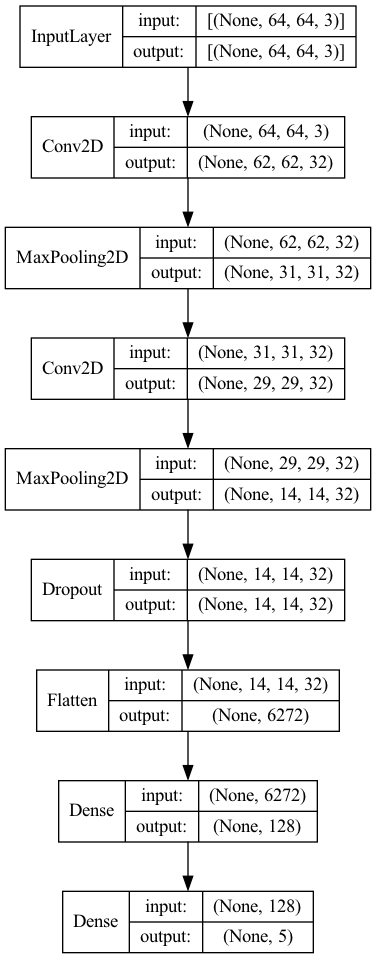

In [53]:
# Plotting model
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(cnn, to_file='./cnn_model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('./cnn_model.png'))

# Step2: CNN model training
1. Compile model with `optimizer`,`loss_function`,`training _log_metrics` & train model
3. Data visualization
4. Test for single picture

## Compile and tain the model

In [54]:
# Compile CNN model
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

history = cnn.fit(x = training_set, 
                  epochs=30,
                  validation_data = test_set)

Epoch 1/30


2023-03-20 12:46:34.633386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - ETA: 0s - loss: 1.3630 - accuracy: 0.4137

2023-03-20 12:46:42.612390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - 10s 96ms/step - loss: 1.3630 - accuracy: 0.4137 - val_loss: 1.2339 - val_accuracy: 0.4326
Epoch 2/30
95/95 [==============================] - 9s 93ms/step - loss: 1.1476 - accuracy: 0.5273 - val_loss: 1.1025 - val_accuracy: 0.5430
Epoch 3/30
95/95 [==============================] - 9s 93ms/step - loss: 1.0590 - accuracy: 0.5773 - val_loss: 1.0558 - val_accuracy: 0.5663
Epoch 4/30
95/95 [==============================] - 9s 97ms/step - loss: 1.0191 - accuracy: 0.6005 - val_loss: 1.0004 - val_accuracy: 0.6000
Epoch 5/30
95/95 [==============================] - 9s 93ms/step - loss: 0.9520 - accuracy: 0.6277 - val_loss: 0.9644 - val_accuracy: 0.6186
Epoch 6/30
95/95 [==============================] - 9s 92ms/step - loss: 0.9037 - accuracy: 0.6505 - val_loss: 0.9901 - val_accuracy: 0.6000
Epoch 7/30
95/95 [==============================] - 9s 91ms/step - loss: 0.8479 - accuracy: 0.6727 - val_loss: 0.9081 - val_accuracy: 0.6372
Epoch 8/30
95/95 [=====

In [55]:
# Accuracy
loss, accuracy= cnn.evaluate(final_set)
print(f'Accuracy: {accuracy*100}')

14/14 [==============================] - 1s 64ms/step - loss: 0.9694 - accuracy: 0.7374
Accuracy: 73.74429702758789


## Data virtualization

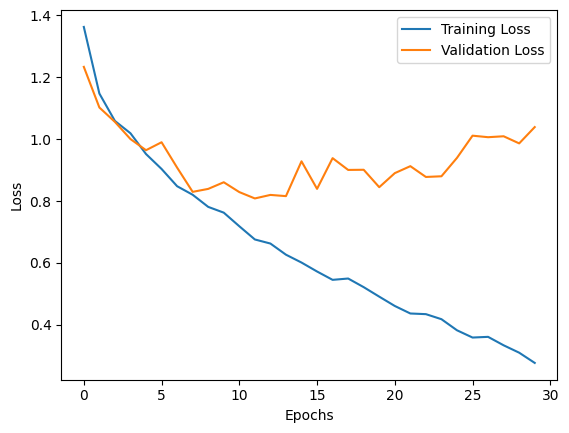

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

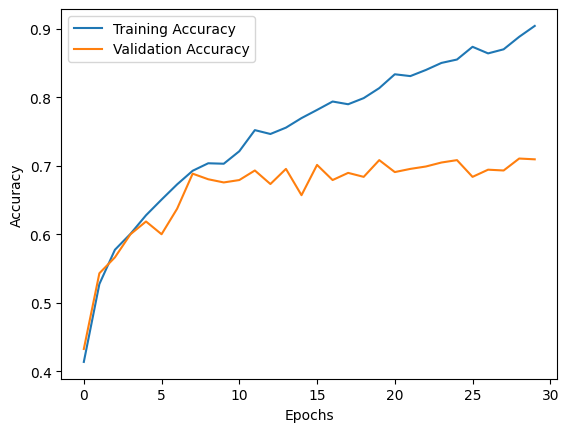

<Figure size 640x480 with 0 Axes>

In [57]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Classifying new Image

In [58]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [59]:
from io import BytesIO
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
import urllib

def loadImage(URL):
    with urllib.request.urlopen(URL) as url:
        img = load_img(BytesIO(url.read()), target_size=(64, 64))

    return img_to_array(img)

In [60]:
import numpy as np
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# test_image = load_img(img, target_size = (64, 64))
test_image = loadImage("https://media.istockphoto.com/id/1094016162/photo/a-field-of-pink-tulips-against-a-clear-cloudy-sky.jpg?s=2048x2048&w=is&k=20&c=6jh6xQhGgLXE_j_VqfPNJcEQNVc2pCrk5YU8hrwtZE0=")
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

1/1 [==============================] - 0s 79ms/step


2023-03-20 12:51:00.582537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [61]:
result

array([[0., 0., 0., 0., 1.]], dtype=float32)